In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import lightgbm as lgb
import os
plt.rcParams["figure.figsize"] = (18, 35)
import warnings
warnings.filterwarnings('ignore')

In [2]:
print((80432+79695+79969+79477+80148)/5)

79944.2


In [4]:
fold = 0
path = 'Models_all_5folds/'
for fname in os.listdir(path):
            if fname.startswith("HT47_fold_{}_iter".format(fold)):
                print(fname)
                model = joblib.load(path + fname)
                # model.save_model(path + 'cp_{}_model.txt'.format(fold))

HT47_fold_0_iter_11841_score_0.80432.pkl


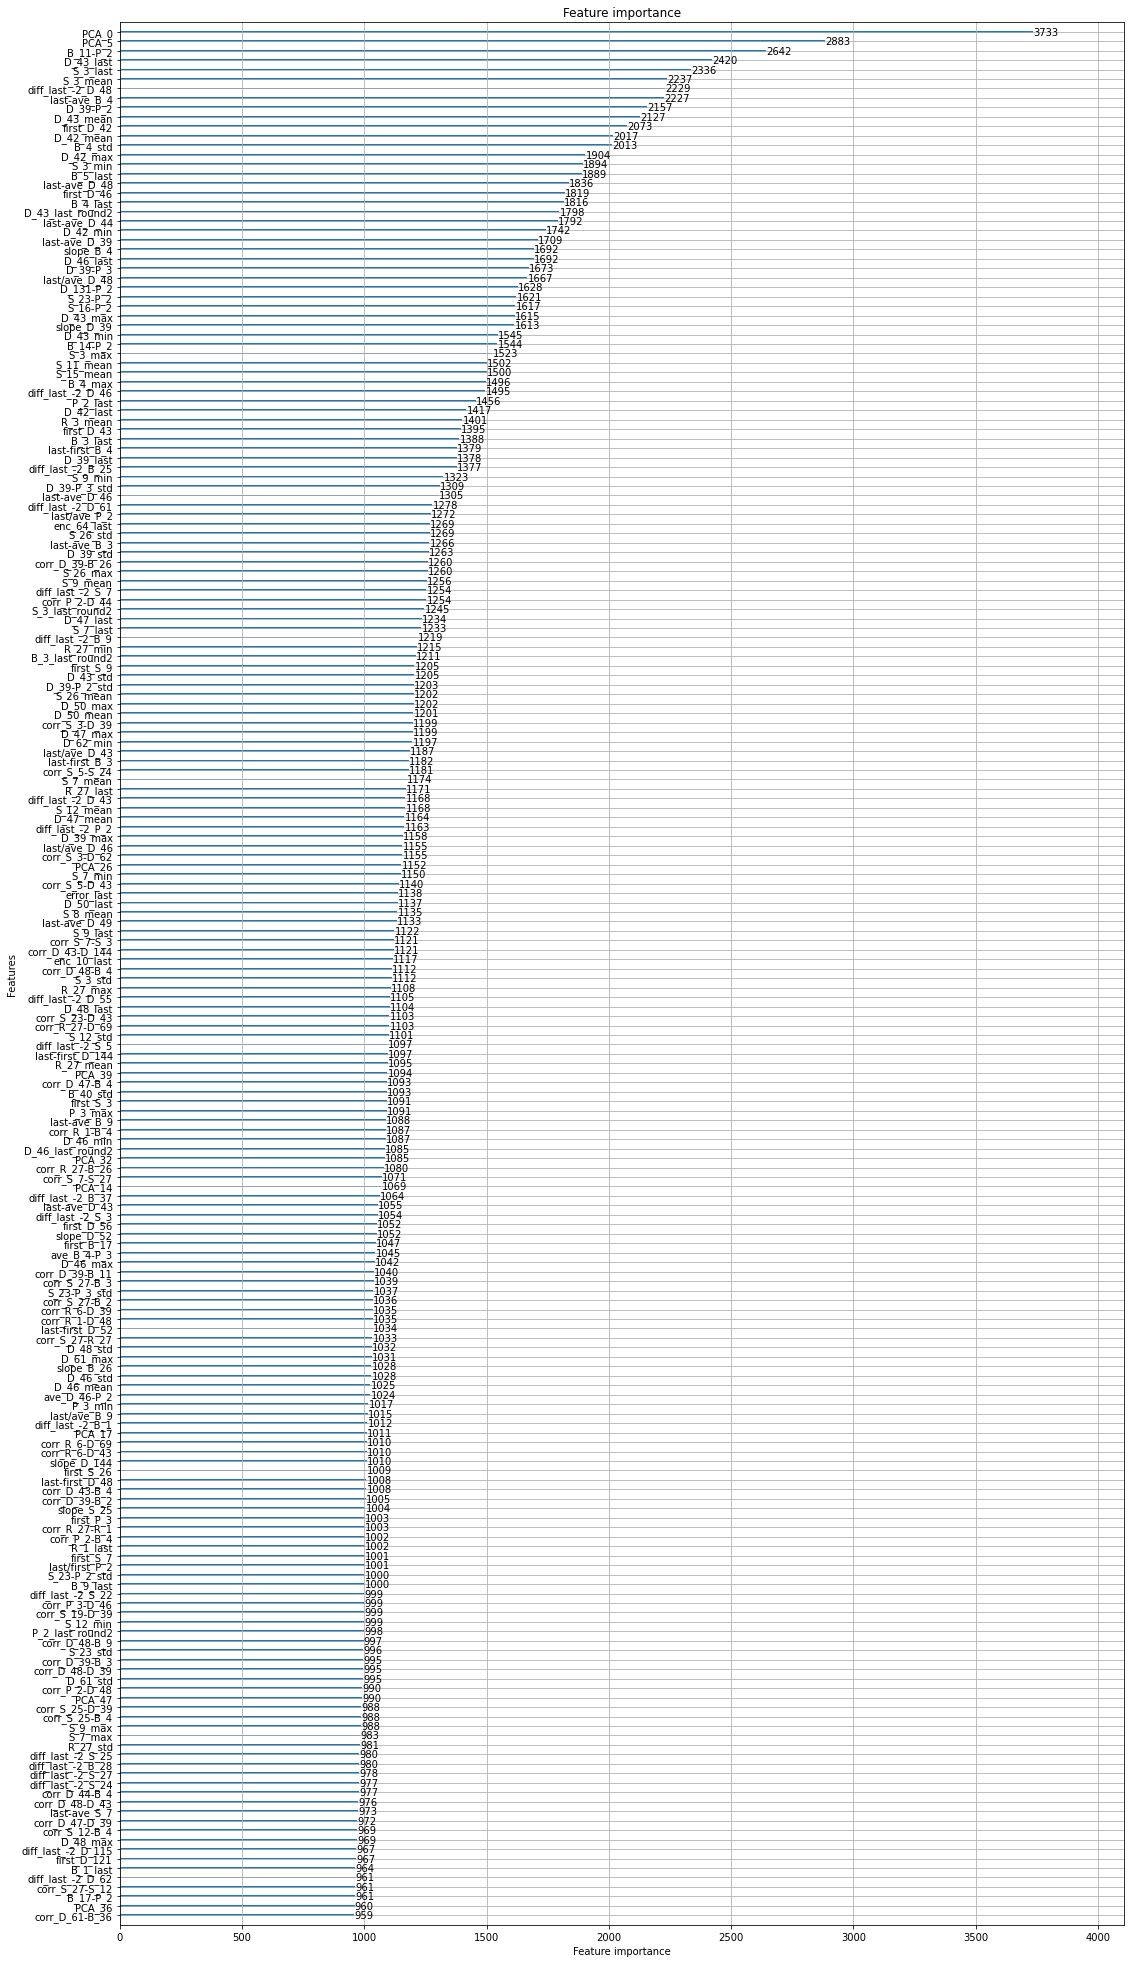

In [6]:
plt.rcParams["figure.figsize"] = (18, 35)
lgb.plot_importance(model, importance_type='split' , max_num_features=200);

In [7]:
fe = model.feature_importance(importance_type='split')
fn = model.feature_name()
df = pd.DataFrame(fe, index=fn, columns=['importance'])
df.sort_values(by='importance', ascending=False, inplace=True)
df.reset_index(inplace=True)

In [8]:
df.head(20)

,index,importance
0,PCA_0,3733
1,PCA_5,2883
2,B_11-P_2,2642
3,D_43_last,2420
4,S_3_last,2336
5,S_3_mean,2237
6,diff_last_-2_D_48,2229
7,last-ave_B_4,2227
8,D_39-P_2,2157
9,D_43_mean,2127


In [9]:
df[df.importance == 0].shape

(42, 2)

In [10]:
df[df['index'].str.contains('enc')]

,index,importance
53,enc_64_last,1269
98,enc_10_last,1117
227,enc_66_last,925
238,enc_22_last,913
281,enc_30_max,868
...,...,...
3073,first_enc_5,1
3104,enc_5_min,0
3115,enc_23_min,0
3124,enc_34_min,0


In [11]:
df[df['index'].str.contains('error')]

,index,importance
91,error_last,1138
301,last-ave_error,854
532,last-first_error,720
695,enc_slope_error,662
723,diff_last_-2_error,653
952,error_std,549
1088,last/ave_error,472
1203,error_max,416
1266,error_min,383
1315,last/first_error,358


In [12]:
df[df['index'].str.startswith('corr_')]

,index,importance
56,corr_D_39-B_26,1260
60,corr_P_2-D_44,1254
73,corr_S_3-D_39,1199
78,corr_S_5-S_24,1181
86,corr_S_3-D_62,1155
90,corr_S_5-D_43,1140
96,corr_S_7-S_3,1121
97,corr_D_43-D_144,1121
100,corr_D_48-B_4,1112
104,corr_S_23-D_43,1103


In [13]:
df[df['index'].str.startswith('ave_')]

,index,importance
129,ave_B_4-P_3,1045
144,ave_D_46-P_2,1024
225,ave_B_4-P_2,927
229,ave_D_46-P_3,924
413,ave_D_131-P_3,776
477,ave_S_16-P_2,743
478,ave_D_44-P_2,742
495,ave_B_11-P_2,735
509,ave_S_16-P_3,729
533,ave_D_44-P_3,719


In [14]:
df[df['index'].str.startswith('cat_')]

,index,importance
1458,cat_-2_D_117,285
1474,cat_-2_D_66,278
1785,cat_-2_D_64,185
1986,cat_first_D_117,142
2147,cat_first_B_38,114
2194,cat_-2_D_114,106
2297,cat_first_D_66,89
2334,cat_first_D_64,82
2430,cat_-2_D_68,62
2458,cat_first_D_68,57


In [15]:
df[df['index'].str.startswith('NA_')]

,index,importance
1605,NA_D_77,235
1899,NA_S_9,158
1900,NA_D_43,158
1941,NA_D_50,150
2193,NA_S_27,106
2308,NA_D_56,87
2395,NA_B_17,69
2411,NA_D_53,65
2479,NA_D_48,55
2490,NA_D_62,54


In [16]:
df[df['index'].str.startswith('diff_last_')]

,index,importance
6,diff_last_-2_D_48,2229
38,diff_last_-2_D_46,1495
46,diff_last_-2_B_25,1377
50,diff_last_-2_D_61,1278
59,diff_last_-2_S_7,1254
...,...,...
3116,diff_last_-2_D_140,0
3125,diff_last_-2_D_107,0
3126,diff_last_-2_B_32,0
3127,diff_last_-2_R_15,0


In [17]:
df[df['index'].str.startswith('date_')]

,index,importance
339,date_day_mean,825
469,date_weekday_mean,746
839,date_day_last,604
1202,date_day_first,416
1459,date_day_min,284
1647,date_day_max,225
1713,date_weekday_first,202
1889,date_weekday_last,161
2658,date_month_mean,31
2664,date_weekday_max,31


In [18]:
df[df['index'].str.startswith('last/')]

,index,importance
26,last/ave_D_48,1667
51,last/ave_P_2,1272
76,last/ave_D_43,1187
87,last/ave_D_46,1155
146,last/ave_B_9,1015
...,...,...
3098,last/first_R_19,0
3099,last/first_B_33,0
3100,last/first_R_4,0
3102,last/first_D_143,0


In [19]:
df[df['index'].str.startswith('slope_')]

,index,importance
24,slope_B_4,1692
31,slope_D_39,1613
127,slope_D_52,1052
142,slope_B_26,1028
149,slope_D_144,1010
...,...,...
2877,slope_D_127,9
2889,slope_R_17,8
3047,slope_D_73,2
3068,slope_D_134,1


In [ ]:
df[df['index'].str.startswith('PCA_')]